In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import jarque_bera
from arch import arch_model
from arch.__future__ import reindexing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [66]:
path_return = ('/Users/zehar/Desktop/returns.csv')
returns = pd.read_csv(path_return)
display(returns)

,date,Asset A,Asset B,Market
0,29/06/2021,0.996681,1.287271,1.601523
1,30/06/2021,0.155969,0.634107,1.837191
2,01/07/2021,1.936764,1.766145,1.989293
3,02/07/2021,-0.848651,-0.796688,-0.405425
4,05/07/2021,1.205787,1.014546,2.729004
...,...,...,...,...
719,01/04/2024,0.000000,0.000000,0.000000
720,02/04/2024,-1.434363,-0.531799,-0.681994
721,03/04/2024,0.518030,-0.130318,-0.385851
722,04/04/2024,0.061054,0.531311,0.390562


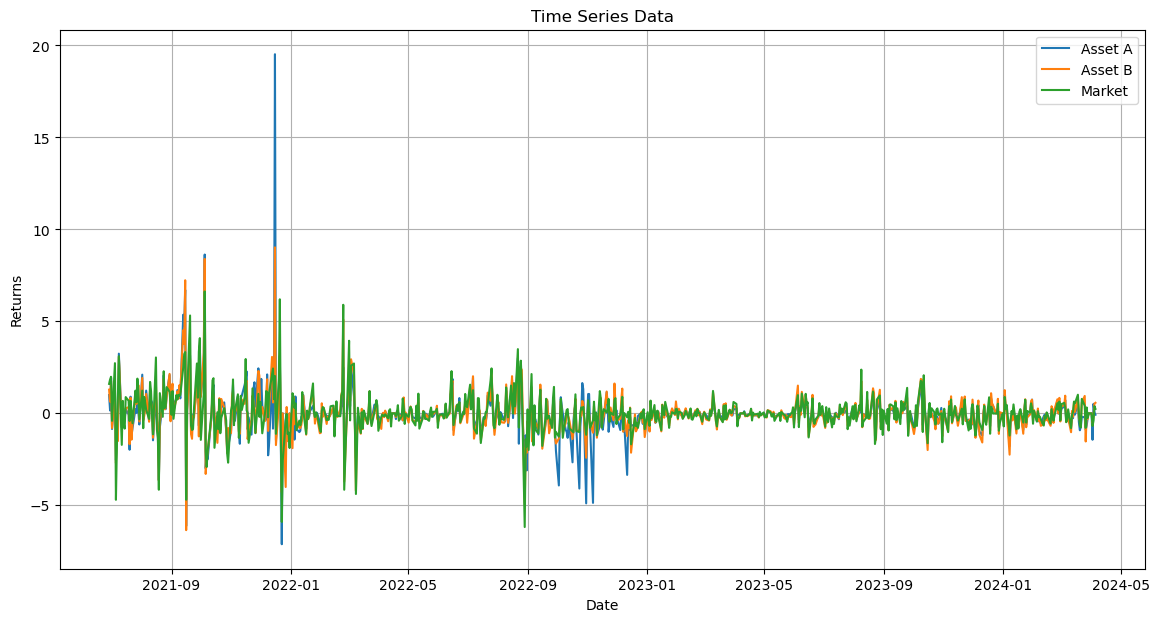

In [67]:
# Convert 'date' to datetime format
returns['date'] = pd.to_datetime(returns['date'], format='%d/%m/%Y')

#set date as an index
returns.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))

plt.plot(returns.index, returns['Asset A'], label='Asset A')
plt.plot(returns.index, returns['Asset B'], label='Asset B')
plt.plot(returns.index, returns['Market'], label='Market')

plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
returns_A = returns['Asset A']
returns_B = returns['Asset B']
market_returns = returns['Market']

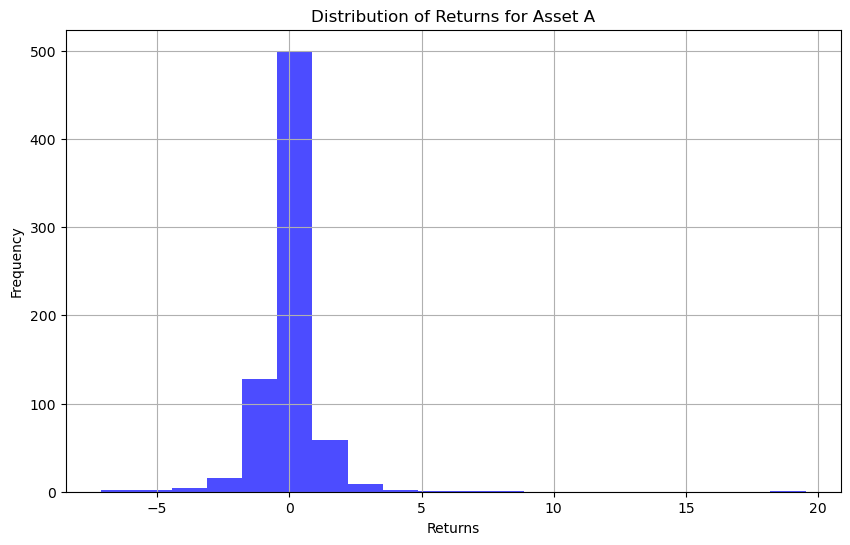

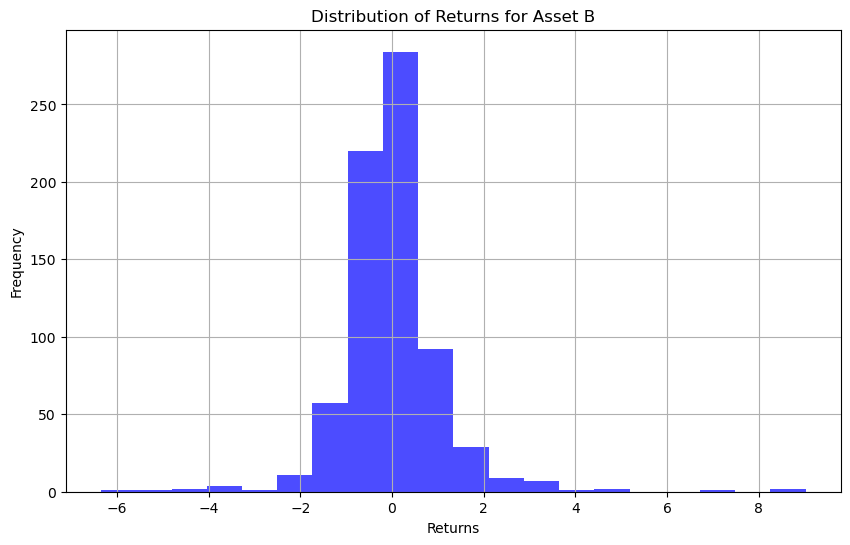

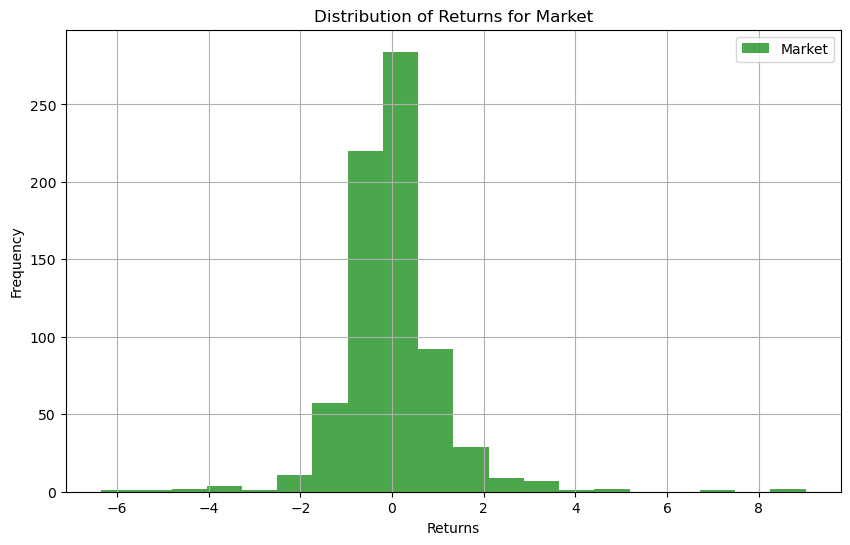

In [69]:

def plot_returns_distribution(returns, asset_name):
    """
    Plot the distribution of returns for a given asset.

    Parameters:
        returns (array-like): Array or Series containing the returns of the asset.
        asset_name (str): Name of the asset.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.hist(returns, bins=20, alpha=0.7, color='blue')
    plt.title(f'Distribution of Returns for {asset_name}')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage:
plot_returns_distribution(returns_A, 'Asset A')
plot_returns_distribution(returns_B, 'Asset B')

# Plot the distribution of returns for Market
plt.figure(figsize=(10, 6))
plt.hist(returns_B, bins=20, alpha=0.7, color='green', label='Market')
plt.title('Distribution of Returns for Market')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Summary statistics
summary_stats = returns.describe()
print("\nSummary statistics:\n", summary_stats)



Summary statistics:
           Asset A     Asset B      Market
count  724.000000  724.000000  724.000000
mean    -0.012698    0.008814    0.052066
std      1.281385    1.122520    1.097120
min     -7.111994   -6.346498   -6.177411
25%     -0.369103   -0.439819   -0.403626
50%     -0.079620   -0.063939    0.000000
75%      0.227200    0.379293    0.435885
max     19.520798    9.024541    6.626334


# Summary statistics
The mean returns indicate that on average, Asset A has a negative return, while Asset B and the Market have positive returns.
The standard deviation indicates that Asset A is the most volatile, followed by Asset B, and then the Market.
The min and max values show the range of returns, highlighting potential outliers or extreme movements in the returns.

In [71]:
# Perform Jarque-Bera test for Asset A
jb_stat_A, jb_p_value_A = jarque_bera(returns_A)
print(f"Jarque-Bera statistic for Asset A: {jb_stat_A}, p-value: {jb_p_value_A}")

# Perform Jarque-Bera test for Asset B
jb_stat_B, jb_p_value_B = jarque_bera(returns_B)
print(f"Jarque-Bera statistic for Asset B: {jb_stat_B}, p-value: {jb_p_value_B}")

# Perform Jarque-Bera test for Market returns
jb_stat_market, jb_p_value_market = jarque_bera(market_returns)
print(f"Jarque-Bera statistic for Market returns: {jb_stat_market}, p-value: {jb_p_value_market}")

Jarque-Bera statistic for Asset A: 197903.3336378132, p-value: 0.0
Jarque-Bera statistic for Asset B: 7237.8317623777775, p-value: 0.0
Jarque-Bera statistic for Market returns: 2460.6405019631425, p-value: 0.0


# Jarque-Bera Test for Normality:
This test assesses whether the returns of Asset A, Asset B, and the Market follow a normal distribution.
For all three series (Asset A, Asset B, and Market), the Jarque-Bera test rejects the null hypothesis of normality at a 1% significance level (p < 0.01). This indicates that the returns are not normally distributed and exhibit skewness and/or kurtosis that deviate from the normal distribution.
A significant result may indicate non-normality, which could impact the validity of certain statistical tests and modeling assumptions.

At a significance level of 0.05, indicates that the null-hypothesis is rejected for the three data sets 

In [72]:
## Perform t-test to compare mean returns 
# t-test will help you determine if there is a statistically significant difference between the means of the returns of Asset A and Asset B
t_stat_AB, p_value = stats.ttest_ind(returns_B,returns_A)
print(f't-statistic returns A vs B: {t_stat_AB}, p-value: {p_value}')
t_stat_AM, p_value = stats.ttest_ind(market_returns,returns_A)
print(f't-statistic returns A vs Market: {t_stat_AM}, p-value: {p_value}')
t_stat_BM, p_value = stats.ttest_ind(market_returns,returns_B)
print(f't-statistic returns B vs Market: {t_stat_BM}, p-value: {p_value}')



t-statistic returns A vs B: 0.339783940204735, p-value: 0.7340685892723545
t-statistic returns A vs Market: 1.0330411451504993, p-value: 0.3017573852549082
t-statistic returns B vs Market: 0.7414528885841488, p-value: 0.45853928518772535


# Hypothesis test
- T-test for mean difference
1. Asset A vs Asset B: t-statistic: 0.3398 -  p-value: 0.7341
Interpretation: There is no significant difference in the mean returns between Asset A and Asset B (p-value > 0.05).

2. Asset A vs Market: t-statistic: 1.0330 - p-value: 0.3018
Interpretation: There is no significant difference in the mean returns between Asset A and the Market (p-value > 0.05).

3. Asset B vs Market: t-statistic: 0.7415 - p-value: 0.4585
Interpretation: There is no significant difference in the mean returns between Asset B and the Market (p-value > 0.05).

- None of the pairs show a significant difference in means (all p-values > 0.05), indicating that the average returns of these series are statistically similar.

In [73]:
## Perform F-test - compare variance of 2 samples
# The F-test will help you determine if there is a statistically significant difference between the variances of the returns of Asset A and Asset B.
f_stat = np.var(returns_A, ddof=1) / np.var(returns_B, ddof=1)
df1 = len(returns_A) - 1
df2 = len(returns_B) - 1
p_value = 1 - stats.f.cdf(f_stat, df1, df2)

print(f'F-statistic: {f_stat}, p-value: {p_value}')
# A low p-value (typically less than 0.05) would indicate a significant difference.

F-statistic: 1.303080980127594, p-value: 0.00019062504785349876


- F Test for Variance F-statistic: 1.3031 - p-value: 0.0002
Interpretation:
- The significant p-value (p < 0.05) indicates that there is a significant difference in the variances of the returns. This suggests heteroscedasticity, which is consistent with the ARCH effects observed. This suggests heteroscedasticity, which is implies to analyse the ARCH effects.

In [74]:
# Specify the lag order for the ARCH test
lag = 1  # You can adjust this value based on your data and preferences

# Fit the ARCH model for Asset A
model_A = arch_model(returns_A, vol='ARCH', p=lag)
result_A = model_A.fit()

# Perform the ARCH test for Asset A
arch_test_result_A = result_A.arch_lm_test()
print("ARCH Test Results for Asset A:")
print(arch_test_result_A)

# Fit the ARCH model for Asset B
model_B = arch_model(returns_B, vol='ARCH', p=lag)
result_B = model_B.fit()

# Perform the ARCH test for Asset B
arch_test_result_B = result_B.arch_lm_test()
print("\nARCH Test Results for Asset B:")
print(arch_test_result_B)

# Fit the ARCH model for Market returns
model_market = arch_model(market_returns, vol='ARCH', p=lag)
result_market = model_market.fit()

# Perform the ARCH test for Market returns
arch_test_result_market = result_market.arch_lm_test()
print("\nARCH Test Results for Market Returns:")
print(arch_test_result_market)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6386.227455854989
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2067.7699826038865
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1064.183679307204
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1063.1390293733612
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1060.2579118908195
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1060.2028700793871
Iteration:      7,   Func. Count:     40,   Neg. LLF: 1060.2017468332192
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1060.2017443712375
Iteration:      9,   Func. Count:     47,   Neg. LLF: 1060.2017459750268
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1060.2017443712375
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
ARCH Test Results for Asset A:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic

# ARCH Model results
Engle's ARCH (Autoregressive Conditional Heteroskedasticity) test examines whether there is ARCH effects in the returns series, which would suggest the presence of volatility clustering in the returns.

- Asset A: No significant ARCH effects (high p-value).
- Asset B and Market: Significant ARCH effects (low p-values).
- Evidence of ARCH effects in Market returns.

Interpretation: Asset A does not show volatility clustering, while Asset B and the Market do, indicating that their volatility changes over time.

> ARCH tests indicate conditional heteroskedasticity (volatility clustering) in Asset B and Market returns but not in Asset A which was suggested by the results of the F-test

In [75]:
# Fit EGARCH models for each asset
egarch_model_A = arch_model(returns_A, vol='EGARCH')
egarch_results_A = egarch_model_A.fit(disp='off')

egarch_model_B = arch_model(returns_B, vol='EGARCH')
egarch_results_B = egarch_model_B.fit(disp='off')

egarch_model_market = arch_model(market_returns, vol='EGARCH')
egarch_results_market = egarch_model_market.fit(disp='off')

# Print model summaries
print("EGARCH Model Results for Asset A:")
print(egarch_results_A.summary())

print("\nEGARCH Model Results for Asset B:")
print(egarch_results_B.summary())

print("\nEGARCH Model Results for Market Returns:")
print(egarch_results_market.summary())

EGARCH Model Results for Asset A:
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Asset A   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -785.616
Distribution:                  Normal   AIC:                           1579.23
Method:            Maximum Likelihood   BIC:                           1597.57
                                        No. Observations:                  724
Date:                Tue, Jun 04 2024   Df Residuals:                      723
Time:                        20:18:03   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu            -0.0749  1.38

# EGARCH Model 
Captures asymmetric volatility effects, such as leverage effects

- EGARCH model results provide estimates for the mean and volatility parameters, indicating significant volatility dynamics.

# Results:

- Asset A: Significant coefficients for volatility dynamics.
- Asset B: Significant coefficients for volatility dynamics.
- Market: Significant coefficients for volatility dynamics.
Interpretation: All three series exhibit significant volatility dynamics and asymmetries, captured well by the EGARCH model.

# Correlation matrix - measuring the linear relationship between the series
- There is a high positive correlation between Asset A and Asset B (0.8696). Both assets are also positively correlated with the Market, but to a lesser extent.

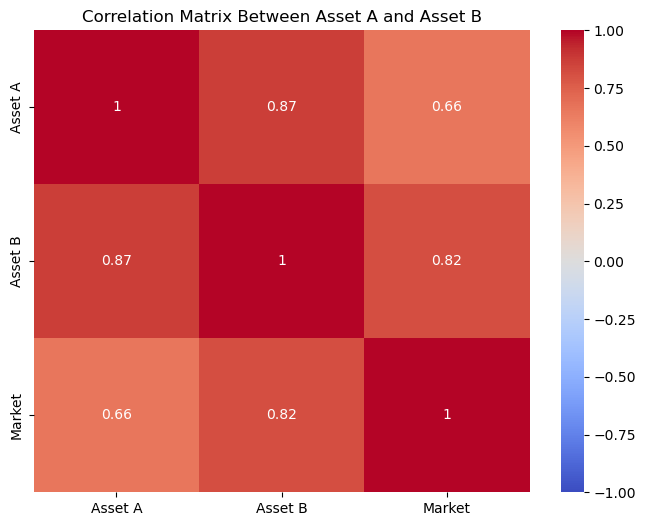

In [76]:
# Compute the correlation matrix
corr_matrix = returns_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Between Asset A and Asset B')
plt.show()

In [92]:
# Create a DataFrame with returns and market returns for VIF calculation
returns_df = pd.DataFrame({
    'Asset A': returns_A,
    'Asset B': returns_B,
    'Market': market_returns
})
# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = returns_df.columns
vif_data['VIF'] = [variance_inflation_factor(returns_df.values, i) for i in range(len(returns_df.columns))]
display(vif_data)


,Feature,VIF
0,Asset A,4.240261
1,Asset B,7.251857
2,Market,3.132924


# VIF
Variance Inflation factor checks for multicolinearity 
- Asset B has the highest VIF, indicating potential multicollinearity. Generally, a VIF above 5 suggests high multicollinearity.
- Asset A and Market have lower VIFs but still indicate some multicollinearity.

In [78]:
# Prepare data for Ridge Regression
X = returns_df[['Market']]
y_A = returns_A
y_B = returns_B
# Add a constant to the market returns for the intercept
X = sm.add_constant(X)

# Define the range of alpha values for cross-validation
alphas = np.logspace(-6, 6, 200)

In [79]:
# Fit Ridge Regression model for Asset A
ridge_A = Ridge(alpha=1.0)
ridge_A.fit(X, y_A)
beta_A = ridge_A.coef_

# Fit Ridge Regression model for Asset B
ridge_B = Ridge(alpha=1.0)
ridge_B.fit(X, y_B)
beta_B = ridge_B.coef_


In [80]:
# Fit RidgeCV model for Asset A to find the best alpha
ridge_cv_A = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_A.fit(X, y_A)
best_alpha_A = ridge_cv_A.alpha_
beta_A = ridge_cv_A.coef_

# Fit RidgeCV model for Asset B to find the best alpha
ridge_cv_B = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_B.fit(X, y_B)
best_alpha_B = ridge_cv_B.alpha_
beta_B = ridge_cv_B.coef_

print(f'Ridge Regression Beta for Asset A: {beta_A[1]}')
print(f'Ridge Regression Beta for Asset B: {beta_B[1]}')
print(f'Optimal alpha for Asset A: {best_alpha_A}')
print(f'Ridge Regression Beta for Asset A: {beta_A[1]}')
print(f'Optimal alpha for Asset B: {best_alpha_B}')
print(f'Ridge Regression Beta for Asset B: {beta_B[1]}')

Ridge Regression Beta for Asset A: 0.7662629029898986
Ridge Regression Beta for Asset B: 0.8352208393749274
Optimal alpha for Asset A: 6.51733960488242
Ridge Regression Beta for Asset A: 0.7662629029898986
Optimal alpha for Asset B: 2.833096101839324
Ridge Regression Beta for Asset B: 0.8352208393749274


# Ridge regression
The Ridge regression results suggest that regularization was necessary to handle multicollinearity, and the optimal alphas indicate the strength of this regularization. The betas for both assets are positive, showing a positive relationship with the predictors.

# Suggested forecast : 
1. Fit EGARCH Model and Perform Rolling Forecast:
- The rolling_forecast_egarch function fits an EGARCH model and performs a rolling forecast to get multi-step variance forecasts.
- The rolling forecast updates the training data for each step, providing a variance forecast for the specified horizon.

In [93]:
# Step 1: Fit EGARCH Model and Perform Rolling Forecast
def rolling_forecast_egarch(returns, forecast_horizon=10):
    model = arch_model(returns, vol='EGARCH', p=1, o=1, q=1, dist='normal')
    forecasted_variance = []

    for i in range(forecast_horizon):
        train_data = returns[:-(forecast_horizon - i)]
        model_fit = model.fit(disp="off")
        forecast = model_fit.forecast(horizon=1).variance.iloc[-1].values[0]
        forecasted_variance.append(forecast)
    
    return forecasted_variance

forecast_horizon = 90
variance_forecast_A = rolling_forecast_egarch(returns_df['Asset A'], forecast_horizon)
variance_forecast_B = rolling_forecast_egarch(returns_df['Asset B'], forecast_horizon)
variance_forecast_market = rolling_forecast_egarch(returns_df['Market'], forecast_horizon)


2. Prepare Feature Set for Ridge Regression:
- The feature set X includes the historical returns and the forecasted variances.
- The forecasted variances are assigned to the last available points in the feature set.
- Handle NaN: we use SimpleImputer from scikit-learn to fill NaN values with the mean of the respective columns.
The imputed data is then converted back to a DataFrame for further processing.

In [94]:
# Step 2: Use Ridge Regression with Forecasted Variance
# Prepare the feature set including forecasted variances
X = returns_df[['Asset A', 'Asset B', 'Market']]
X['Variance Forecast A'] = np.nan
X['Variance Forecast B'] = np.nan
X['Variance Forecast Market'] = np.nan

# Assign the forecasted variances to the last available points
X.iloc[-forecast_horizon:, X.columns.get_loc('Variance Forecast A')] = variance_forecast_A
X.iloc[-forecast_horizon:, X.columns.get_loc('Variance Forecast B')] = variance_forecast_B
X.iloc[-forecast_horizon:, X.columns.get_loc('Variance Forecast Market')] = variance_forecast_market

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X_imputed = pd.DataFrame(X_imputed, index=X.index, columns=X.columns)


4. Fit Ridge Regression Model:
- Ridge regression models are fitted for Asset A and Asset B using the prepared and imputed feature set, excluding the forecast horizon period.Forecasted returns are generated for the entire period.
5. Plot Results:
- The actual returns and the forecasted returns are plotted for both Asset A and Asset B.
Mean Squared Error (MSE) is calculated and printed for the forecast horizon period to evaluate the performance of the forecasts.
- MSE provides a quantitative measure of forecast accuracy.

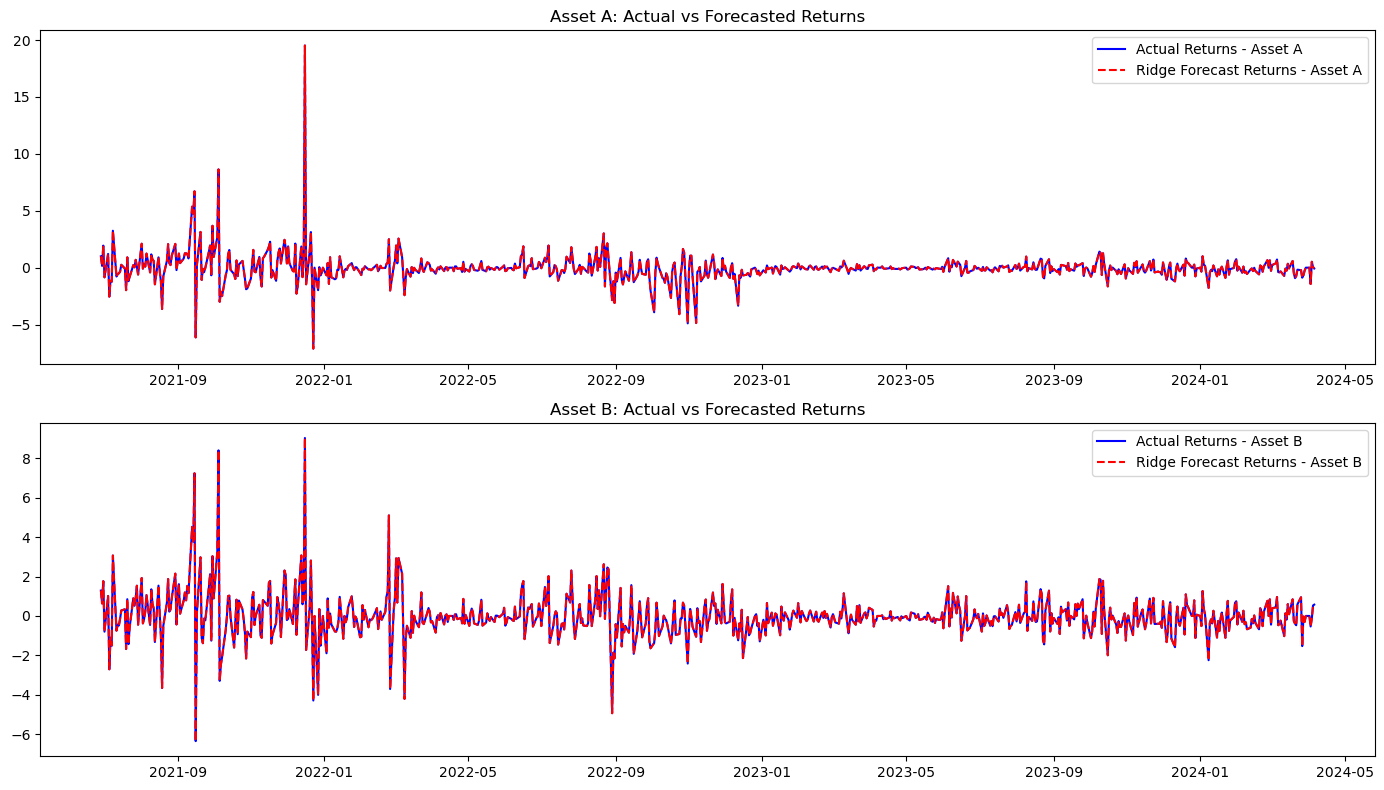

Mean Squared Error for Asset A Forecast: 5.6110260002506897e-14
Mean Squared Error for Asset B Forecast: 2.6757748680304724e-13


In [95]:
# Target variables
y_A = returns_df['Asset A']
y_B = returns_df['Asset B']

# Define alphas for RidgeCV
alphas = np.logspace(-6, 6, 13)

# Fit RidgeCV model for Asset A
ridge_cv_A = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_A.fit(X_imputed[:-forecast_horizon], y_A[:-forecast_horizon])
ridge_forecast_A = ridge_cv_A.predict(X_imputed)

# Fit RidgeCV model for Asset B
ridge_cv_B = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_B.fit(X_imputed[:-forecast_horizon], y_B[:-forecast_horizon])
ridge_forecast_B = ridge_cv_B.predict(X_imputed)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot for Asset A
plt.subplot(2, 1, 1)
plt.plot(y_A.index, y_A, label='Actual Returns - Asset A', color='blue')
plt.plot(y_A.index, ridge_forecast_A, label='Ridge Forecast Returns - Asset A', color='red', linestyle='--')
plt.title('Asset A: Actual vs Forecasted Returns')
plt.legend()

# Plot for Asset B
plt.subplot(2, 1, 2)
plt.plot(y_B.index, y_B, label='Actual Returns - Asset B', color='blue')
plt.plot(y_B.index, ridge_forecast_B, label='Ridge Forecast Returns - Asset B', color='red', linestyle='--')
plt.title('Asset B: Actual vs Forecasted Returns')
plt.legend()

plt.tight_layout()
plt.show()

# Print the Mean Squared Error for the forecasts
mse_A = mean_squared_error(y_A[-forecast_horizon:], ridge_forecast_A[-forecast_horizon:])
mse_B = mean_squared_error(y_B[-forecast_horizon:], ridge_forecast_B[-forecast_horizon:])

print(f"Mean Squared Error for Asset A Forecast: {mse_A}")
print(f"Mean Squared Error for Asset B Forecast: {mse_B}")

In [ ]:
# Create a DataFrame to save the results
results_df = pd.DataFrame({
    'Date': returns_df.index,
    'Actual Returns - Asset A': y_A,
    'Forecasted Returns - Asset A': ridge_forecast_A,
    'Actual Returns - Asset B': y_B,
    'Forecasted Returns - Asset B': ridge_forecast_B
})

# Save the DataFrame to a CSV file
results_df.to_csv('forecasted_returns.csv', index=False)